<a href="https://colab.research.google.com/github/tranbaquang1708/GraduationThesis/blob/irg_prototype/IGR_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from modules import Rbf, IGR

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Off surface points
filename = mp + '/dataset/2d/riderr.vert'
dataset, normal_vectors = IGR.read_txt2(filename, device)
# dataset, mormal_vectors = dataset.to(device), normal_vectors.to(device)
# dataset = dataset.to(device)
# dataset.requires_grad = True
# print(dataset)
# print(normal_vectors)

In [5]:
network = IGR.train(dataset, normal_vectors, 5000, device)

Step 500:
tensor(1.0118, device='cuda:0', grad_fn=<MeanBackward0>)
Step 1000:
tensor(1.1204, device='cuda:0', grad_fn=<MeanBackward0>)
Step 1500:
tensor(1.0344, device='cuda:0', grad_fn=<MeanBackward0>)
Step 2000:
tensor(1.2205, device='cuda:0', grad_fn=<MeanBackward0>)
Step 2500:
tensor(1.2300, device='cuda:0', grad_fn=<MeanBackward0>)
Step 3000:
tensor(1.2370, device='cuda:0', grad_fn=<MeanBackward0>)
Step 3500:
tensor(1.2029, device='cuda:0', grad_fn=<MeanBackward0>)
Step 4000:
tensor(1.1824, device='cuda:0', grad_fn=<MeanBackward0>)
Step 4500:
tensor(1.1695, device='cuda:0', grad_fn=<MeanBackward0>)
Step 5000:
tensor(1.1600, device='cuda:0', grad_fn=<MeanBackward0>)


In [6]:
xx, yy = IGR.grid(dataset[:,0], dataset[:,1], device)

In [7]:
# xx,yy = Rbf.grid(dataset[:,0].numpy(), dataset[:,1].numpy())
# z = sampling(result.detach().numpy(), xx ,yy)
# z = sampling(dataset.numpy(), result.detach().numpy(), xx, yy)
z = IGR.sampling(network, xx, yy)

tensor([[ 1.2051e-05,  1.7952e-05,  2.3928e-05,  ..., -3.0618e-05,
         -3.3129e-05, -3.5349e-05],
        [ 2.2996e-05,  3.0201e-05,  3.7443e-05,  ..., -2.8346e-05,
         -3.1192e-05, -3.3695e-05],
        [ 3.5372e-05,  4.4089e-05,  5.3156e-05,  ..., -2.5842e-05,
         -2.9061e-05, -3.1885e-05],
        ...,
        [ 6.2119e-05,  7.1947e-05,  8.1781e-05,  ..., -2.0448e-05,
         -2.4196e-05, -2.7608e-05],
        [ 4.6771e-05,  5.4765e-05,  6.2879e-05,  ..., -2.3197e-05,
         -2.6394e-05, -2.9396e-05],
        [ 3.3099e-05,  3.9604e-05,  4.6339e-05,  ..., -2.5723e-05,
         -2.8644e-05, -3.1170e-05]], device='cuda:0', grad_fn=<ViewBackward>)


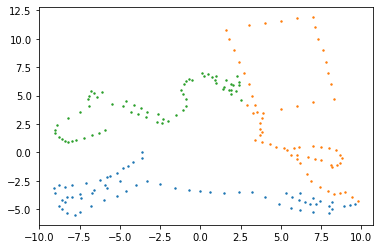

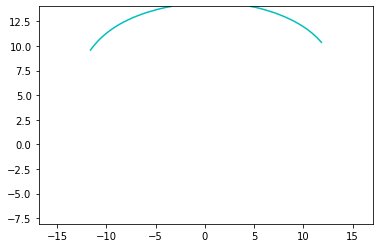

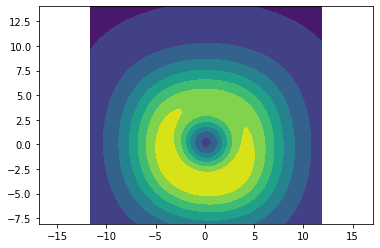

In [8]:
Rbf.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=False, surface=True, offsurface=False, filled_contour=True)

In [9]:
# x = torch.tensor([[5, 3], [2, 1], [3,2]], dtype=torch.float)
# y = torch.tensor([[1,1], [1,2], [3,2]], dtype=torch.float)

# x = x.numpy()
# y = y.numpy()

# t = np.concatenate((x,y), axis = 1)

# # t = torch.matmul(torch.transpose(x, 0, 1),y)
# # t = torch.matmul(x[:, :], y[:,:)])
# # t = x * y [:, None]
# # t = torch.cat((x,y), dim=1)
# # t = t.numpy()
# # t = np.sum(t, axis=1)
# # t = np.sum(t, axis=1)

# print(t)

In [10]:
# x = torch.tensor([[5, 3], [0, 1], [3,2]], dtype=torch.float)
# y = torch.tensor([[1,1], [1,2], [2,3]], dtype=torch.float)
# w = torch.tensor([[5], [2], [1]], dtype=torch.float)

# t = torch.cat((x,y), axis = 0)

# n = torch.norm(t, dim=1)
# # n = torch.reshape(n, (n.shape[0],1))

# n = F.normalize(t)

# # # t = torch.matmul(torch.transpose(x, 0, 1),y)
# # # t = torch.matmul(x[:, :], y[:,:)])
# # t = x - y [:, None]
# # # t = torch.cat((x,y), dim=1)
# # # t = t.numpy()
# # t = torch.sum(t, dim=2)
# # # t = w*t
# # # t = torch.sum(t, dim=0)

# print(t)
# print(n)
# # print(normal_vectors)

In [11]:
# x = torch.tensor([[5], [2], [1], [3],[2]], dtype=torch.float)
# y = torch.tensor([1, 2, 3, 4], dtype=torch.float)

# # t = x[None, :] * y[:, None]
# t = x * y
# t = torch.sum(t, dim=0)
# print(t)